# Historical Financial Ratios

### 1. Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from numpy_ext import rolling_apply

### 2. Data processing

#### 2.1. Reading data from CSV

In [2]:
SHILLER_DATA_PATH = "../../data/raw/economy/shiller.csv"
ERN_DATA_PATH = "../../data/raw/economy/ern.csv"
PDE_COLS = [ "date", "cpi", "price", "dividends", "earnings" ]
TAX_COLS = [ "date", "cpi", "price", "dividends", "earnings", "corporate_tax_rate" ]

In [3]:
shiller_df = pd.read_csv(SHILLER_DATA_PATH)
shiller_df

,date,price,dividends,earnings,cpi,long_term_interest_rate
0,1871-01,4.44,0.2600,0.40,12.464,5.32
1,1871-02,4.50,0.2600,0.40,12.845,5.32
2,1871-03,4.61,0.2600,0.40,13.035,5.33
3,1871-04,4.74,0.2600,0.40,12.559,5.33
4,1871-05,4.86,0.2600,0.40,12.274,5.33
...,...,...,...,...,...,...
1843,2024-08,5478.21,72.9253,199.10,314.796,3.87
1844,2024-09,5621.26,73.4000,200.27,315.301,3.72
1845,2024-10,5792.32,73.8774,203.57,315.664,4.10
1846,2024-11,5929.92,74.3548,206.87,315.493,4.36


In [4]:
ern_df = pd.read_csv(ERN_DATA_PATH)
ern_df

,date,price,dividends,earnings,cpi,long_term_interest_rate,corporate_tax_rate
0,1871-01,4.44,0.2600,0.40,12.464,5.32,0.00
1,1871-02,4.50,0.2600,0.40,12.845,5.32,0.00
2,1871-03,4.61,0.2600,0.40,13.035,5.33,0.00
3,1871-04,4.75,0.2600,0.40,12.559,5.33,0.00
4,1871-05,4.86,0.2600,0.40,12.274,5.33,0.00
...,...,...,...,...,...,...,...
1843,2024-08,5648.40,72.9253,198.82,314.131,3.87,0.21
1844,2024-09,5762.48,73.4000,200.27,314.851,3.72,0.21
1845,2024-10,5705.45,73.8774,203.57,315.564,4.10,0.21
1846,2024-11,6032.38,74.3548,206.87,316.449,4.36,0.21


#### 2.2. Keeping only the relevant information

In [5]:
pde_df = shiller_df[PDE_COLS]
pde_df

,date,cpi,price,dividends,earnings
0,1871-01,12.464,4.44,0.2600,0.40
1,1871-02,12.845,4.50,0.2600,0.40
2,1871-03,13.035,4.61,0.2600,0.40
3,1871-04,12.559,4.74,0.2600,0.40
4,1871-05,12.274,4.86,0.2600,0.40
...,...,...,...,...,...
1843,2024-08,314.796,5478.21,72.9253,199.10
1844,2024-09,315.301,5621.26,73.4000,200.27
1845,2024-10,315.664,5792.32,73.8774,203.57
1846,2024-11,315.493,5929.92,74.3548,206.87


In [6]:
tax_df = ern_df[TAX_COLS]
tax_df

,date,cpi,price,dividends,earnings,corporate_tax_rate
0,1871-01,12.464,4.44,0.2600,0.40,0.00
1,1871-02,12.845,4.50,0.2600,0.40,0.00
2,1871-03,13.035,4.61,0.2600,0.40,0.00
3,1871-04,12.559,4.75,0.2600,0.40,0.00
4,1871-05,12.274,4.86,0.2600,0.40,0.00
...,...,...,...,...,...,...
1843,2024-08,314.131,5648.40,72.9253,198.82,0.21
1844,2024-09,314.851,5762.48,73.4000,200.27,0.21
1845,2024-10,315.564,5705.45,73.8774,203.57,0.21
1846,2024-11,316.449,6032.38,74.3548,206.87,0.21


### 3. Appending simple ratio columns

In [7]:
DATE_COL = "date"
CPI_COL = "cpi"
PRICE_COL = "price"
DIVIDENDS_COL = "dividends"
EARNINGS_COL = "earnings"
CORP_TAX_COL = "corporate_tax_rate"

PE_COL = "price_to_earnings"
EY_COL = "earnings_yield"
PD_COL = "price_to_dividends"
DY_COL = "dividends_yield"
DC_COL = "dividend_cover"
DP_COL = "dividend_payout"

In [8]:
ratios_df = pde_df.copy()

#### 3.1. Price-to-earnings ratio

In [9]:
ratios_df[PE_COL] = ratios_df[PRICE_COL] / ratios_df[EARNINGS_COL]
ratios_df[[DATE_COL, PRICE_COL, DIVIDENDS_COL, EARNINGS_COL, PE_COL]]

,date,price,dividends,earnings,price_to_earnings
0,1871-01,4.44,0.2600,0.40,11.100000
1,1871-02,4.50,0.2600,0.40,11.250000
2,1871-03,4.61,0.2600,0.40,11.525000
3,1871-04,4.74,0.2600,0.40,11.850000
4,1871-05,4.86,0.2600,0.40,12.150000
...,...,...,...,...,...
1843,2024-08,5478.21,72.9253,199.10,27.514867
1844,2024-09,5621.26,73.4000,200.27,28.068408
1845,2024-10,5792.32,73.8774,203.57,28.453701
1846,2024-11,5929.92,74.3548,206.87,28.664959


#### 3.2. Earnings yield

In [10]:
ratios_df[EY_COL] = 1.0 / ratios_df[PE_COL]
ratios_df[[DATE_COL, PRICE_COL, DIVIDENDS_COL, EARNINGS_COL, EY_COL]]

,date,price,dividends,earnings,earnings_yield
0,1871-01,4.44,0.2600,0.40,0.090090
1,1871-02,4.50,0.2600,0.40,0.088889
2,1871-03,4.61,0.2600,0.40,0.086768
3,1871-04,4.74,0.2600,0.40,0.084388
4,1871-05,4.86,0.2600,0.40,0.082305
...,...,...,...,...,...
1843,2024-08,5478.21,72.9253,199.10,0.036344
1844,2024-09,5621.26,73.4000,200.27,0.035627
1845,2024-10,5792.32,73.8774,203.57,0.035145
1846,2024-11,5929.92,74.3548,206.87,0.034886


#### 3.3. Price-to-dividends ratio

In [11]:
ratios_df[PD_COL] = ratios_df[PRICE_COL] / ratios_df[DIVIDENDS_COL]
ratios_df[[DATE_COL, PRICE_COL, DIVIDENDS_COL, EARNINGS_COL, PD_COL]]

,date,price,dividends,earnings,price_to_dividends
0,1871-01,4.44,0.2600,0.40,17.076923
1,1871-02,4.50,0.2600,0.40,17.307692
2,1871-03,4.61,0.2600,0.40,17.730769
3,1871-04,4.74,0.2600,0.40,18.230769
4,1871-05,4.86,0.2600,0.40,18.692308
...,...,...,...,...,...
1843,2024-08,5478.21,72.9253,199.10,75.120843
1844,2024-09,5621.26,73.4000,200.27,76.583924
1845,2024-10,5792.32,73.8774,203.57,78.404492
1846,2024-11,5929.92,74.3548,206.87,79.751677


#### 3.4. Dividends yield

In [12]:
ratios_df[DY_COL] = 1.0 / ratios_df[PD_COL]
ratios_df[[DATE_COL, PRICE_COL, DIVIDENDS_COL, EARNINGS_COL, DY_COL]]

,date,price,dividends,earnings,dividends_yield
0,1871-01,4.44,0.2600,0.40,0.058559
1,1871-02,4.50,0.2600,0.40,0.057778
2,1871-03,4.61,0.2600,0.40,0.056399
3,1871-04,4.74,0.2600,0.40,0.054852
4,1871-05,4.86,0.2600,0.40,0.053498
...,...,...,...,...,...
1843,2024-08,5478.21,72.9253,199.10,0.013312
1844,2024-09,5621.26,73.4000,200.27,0.013058
1845,2024-10,5792.32,73.8774,203.57,0.012754
1846,2024-11,5929.92,74.3548,206.87,0.012539


#### 3.5. Dividend cover

In [13]:
ratios_df[DC_COL] = ratios_df[EY_COL] * ratios_df[PD_COL]
ratios_df[[DATE_COL, PRICE_COL, DIVIDENDS_COL, EARNINGS_COL, DC_COL]]

,date,price,dividends,earnings,dividend_cover
0,1871-01,4.44,0.2600,0.40,1.538462
1,1871-02,4.50,0.2600,0.40,1.538462
2,1871-03,4.61,0.2600,0.40,1.538462
3,1871-04,4.74,0.2600,0.40,1.538462
4,1871-05,4.86,0.2600,0.40,1.538462
...,...,...,...,...,...
1843,2024-08,5478.21,72.9253,199.10,2.730191
1844,2024-09,5621.26,73.4000,200.27,2.728474
1845,2024-10,5792.32,73.8774,203.57,2.755511
1846,2024-11,5929.92,74.3548,206.87,2.782201


#### 3.6. Dividend payout ratio

In [14]:
ratios_df[DP_COL] = ratios_df[DY_COL] * ratios_df[PE_COL]
ratios_df[[DATE_COL, PRICE_COL, DIVIDENDS_COL, EARNINGS_COL, DP_COL]]

,date,price,dividends,earnings,dividend_payout
0,1871-01,4.44,0.2600,0.40,0.650000
1,1871-02,4.50,0.2600,0.40,0.650000
2,1871-03,4.61,0.2600,0.40,0.650000
3,1871-04,4.74,0.2600,0.40,0.650000
4,1871-05,4.86,0.2600,0.40,0.650000
...,...,...,...,...,...
1843,2024-08,5478.21,72.9253,199.10,0.366275
1844,2024-09,5621.26,73.4000,200.27,0.366505
1845,2024-10,5792.32,73.8774,203.57,0.362909
1846,2024-11,5929.92,74.3548,206.87,0.359428


### 4. Appending more complex ratio columns

In [15]:
H_CAPE_COL = "half_cyclically_adjusted_price_to_earnings"
H_CAEY_COL = "half_cyclically_adjusted_earnings_yield"
CAPE_COL = "cyclically_adjusted_price_to_earnings"
CAEY_COL = "cyclically_adjusted_earnings_yield"

In [16]:
REAL_PRICE_COL = "real_price"
REAL_DIVIDENDS_COL = "real_dividends"
REAL_EARNINGS_COL = "real_earnings"
AVG_REAL_EARNINGS_COL = "avg_real_earnings"

FORWARD_CORP_TAX_COL = "6m_forward_corporate_tax_rate"

PRE_TAX_EARNINGS_COL = "pre_tax_earnings"
REAL_PRE_TAX_EARNINGS_COL = "real_pre_tax_earnings"
RETAINED_EARNINGS_COL = "retained_earnings"
EARNINGS_SCALING_FACTOR_COL = "earnings_scaling_factor"

In [17]:
def cape(df, periods):
  cape_df = df.copy()

  curr_cpi = cape_df.iloc[-1][CPI_COL]
  cape_df[REAL_PRICE_COL] = cape_df[PRICE_COL] * (curr_cpi / cape_df[CPI_COL])
  cape_df[REAL_EARNINGS_COL] = cape_df[EARNINGS_COL] * (curr_cpi / cape_df[CPI_COL])

  cape_df[AVG_REAL_EARNINGS_COL] = rolling_apply(np.mean, periods, cape_df[REAL_EARNINGS_COL])

  return cape_df[REAL_PRICE_COL] / cape_df[AVG_REAL_EARNINGS_COL]

#### 4.1. 5-year cyclically-adjusted-price-to-earnings ratio

In [18]:
ratios_df[H_CAPE_COL] = cape(ratios_df, 60)
ratios_df[[DATE_COL, PRICE_COL, DIVIDENDS_COL, EARNINGS_COL, H_CAPE_COL]]

,date,price,dividends,earnings,half_cyclically_adjusted_price_to_earnings
0,1871-01,4.44,0.2600,0.40,NaN
1,1871-02,4.50,0.2600,0.40,NaN
2,1871-03,4.61,0.2600,0.40,NaN
3,1871-04,4.74,0.2600,0.40,NaN
4,1871-05,4.86,0.2600,0.40,NaN
...,...,...,...,...,...
1843,2024-08,5478.21,72.9253,199.10,30.855469
1844,2024-09,5621.26,73.4000,200.27,31.501034
1845,2024-10,5792.32,73.8774,203.57,32.308179
1846,2024-11,5929.92,74.3548,206.87,32.975577


#### 4.2. 5-year cyclically-adjusted-earnings-yield

In [19]:
ratios_df[H_CAEY_COL] = 1.0 / ratios_df[H_CAPE_COL]
ratios_df[[DATE_COL, PRICE_COL, DIVIDENDS_COL, EARNINGS_COL, H_CAEY_COL]]

,date,price,dividends,earnings,half_cyclically_adjusted_earnings_yield
0,1871-01,4.44,0.2600,0.40,NaN
1,1871-02,4.50,0.2600,0.40,NaN
2,1871-03,4.61,0.2600,0.40,NaN
3,1871-04,4.74,0.2600,0.40,NaN
4,1871-05,4.86,0.2600,0.40,NaN
...,...,...,...,...,...
1843,2024-08,5478.21,72.9253,199.10,0.032409
1844,2024-09,5621.26,73.4000,200.27,0.031745
1845,2024-10,5792.32,73.8774,203.57,0.030952
1846,2024-11,5929.92,74.3548,206.87,0.030325


#### 4.3. 10-year cyclically-adjusted-price-to-earnings ratio (Shiller CAPE)

In [20]:
ratios_df[CAPE_COL] = cape(ratios_df, 120)
ratios_df[[DATE_COL, PRICE_COL, DIVIDENDS_COL, EARNINGS_COL, CAPE_COL]]

,date,price,dividends,earnings,cyclically_adjusted_price_to_earnings
0,1871-01,4.44,0.2600,0.40,NaN
1,1871-02,4.50,0.2600,0.40,NaN
2,1871-03,4.61,0.2600,0.40,NaN
3,1871-04,4.74,0.2600,0.40,NaN
4,1871-05,4.86,0.2600,0.40,NaN
...,...,...,...,...,...
1843,2024-08,5478.21,72.9253,199.10,34.808450
1844,2024-09,5621.26,73.4000,200.27,35.547590
1845,2024-10,5792.32,73.8774,203.57,36.463761
1846,2024-11,5929.92,74.3548,206.87,37.216293


#### 4.4. 10-year cyclically-adjusted-earnings-yield (Shiller CAEY)

In [21]:
ratios_df[CAEY_COL] = 1.0 / ratios_df[CAPE_COL]
ratios_df[[DATE_COL, PRICE_COL, DIVIDENDS_COL, EARNINGS_COL, CAEY_COL]]

,date,price,dividends,earnings,cyclically_adjusted_earnings_yield
0,1871-01,4.44,0.2600,0.40,NaN
1,1871-02,4.50,0.2600,0.40,NaN
2,1871-03,4.61,0.2600,0.40,NaN
3,1871-04,4.74,0.2600,0.40,NaN
4,1871-05,4.86,0.2600,0.40,NaN
...,...,...,...,...,...
1843,2024-08,5478.21,72.9253,199.10,0.028729
1844,2024-09,5621.26,73.4000,200.27,0.028131
1845,2024-10,5792.32,73.8774,203.57,0.027424
1846,2024-11,5929.92,74.3548,206.87,0.026870


### 5. Appending some variants of the ratios

In [22]:
P_CAPE_COL = "p_cape"
P_CAEY_COL = "p_caey"
ERN_CAPE_COL = "ern_cape"
ERN_CAEY_COL = "ern_caey"

In [23]:
def avg_real_earnings(dividend_payout_ratio, real_earnings, caey):
  num_periods = caey.size
  freq = 12.0
  num_yields = (num_periods - np.arange(num_periods) - 1) / freq

  # a = p * (1 + r/n)^nt
  #   with
  #     n = 12, t = 120/12 = 10
  adjusted_real_earnings = dividend_payout_ratio * real_earnings + \
    (1 - dividend_payout_ratio) * real_earnings * np.power((1.0 + caey/freq), freq*num_yields)

  return np.mean(adjusted_real_earnings)


def p_cape(df, periods):
  p_cape_df = df.copy()

  curr_cpi = p_cape_df.iloc[-1][CPI_COL]
  p_cape_df[REAL_PRICE_COL] = p_cape_df[PRICE_COL] * (curr_cpi / p_cape_df[CPI_COL])
  p_cape_df[REAL_EARNINGS_COL] = p_cape_df[EARNINGS_COL] * (curr_cpi / p_cape_df[CPI_COL])
  
  p_cape_df[AVG_REAL_EARNINGS_COL] = \
    rolling_apply(
      avg_real_earnings,
      periods,
      p_cape_df[DP_COL],
      p_cape_df[REAL_EARNINGS_COL],
      p_cape_df[CAEY_COL],
    )

  return p_cape_df[REAL_PRICE_COL] / p_cape_df[AVG_REAL_EARNINGS_COL]

In [24]:
def scaled_real_pretax_earnings(real_pretax_earnings, scaling_factors):
  return np.mean(real_pretax_earnings * scaling_factors)


def ern_cape(df, periods):
  ern_cape_df = df.copy()

  last_rate = ern_cape_df[CORP_TAX_COL].iloc[-1]
  ern_cape_df[FORWARD_CORP_TAX_COL] = ern_cape_df[CORP_TAX_COL].shift(-6)
  ern_cape_df[FORWARD_CORP_TAX_COL].fillna(last_rate, inplace=True)

  curr_cpi = ern_cape_df.iloc[-1][CPI_COL]

  ern_cape_df[PRE_TAX_EARNINGS_COL] = \
    ern_cape_df[EARNINGS_COL] / (1.0 - ern_cape_df[CORP_TAX_COL])
  ern_cape_df[REAL_PRE_TAX_EARNINGS_COL] = \
    ern_cape_df[PRE_TAX_EARNINGS_COL] * (curr_cpi / ern_cape_df[CPI_COL])

  ern_cape_df[REAL_PRICE_COL] = ern_cape_df[PRICE_COL] * (curr_cpi / ern_cape_df[CPI_COL])
  ern_cape_df[REAL_DIVIDENDS_COL] = ern_cape_df[DIVIDENDS_COL] * (curr_cpi / ern_cape_df[CPI_COL])
  ern_cape_df[EY_COL] = ern_cape_df[REAL_PRE_TAX_EARNINGS_COL] / ern_cape_df[REAL_PRICE_COL]
  ern_cape_df[DY_COL] = ern_cape_df[REAL_DIVIDENDS_COL] / ern_cape_df[REAL_PRICE_COL]

  ern_cape_df[RETAINED_EARNINGS_COL] = ern_cape_df[EY_COL] - ern_cape_df[DY_COL]

  factors = 1.0 / (1.0 - ern_cape_df[RETAINED_EARNINGS_COL] / 12)
  factors.iloc[-1] = 1.0
  ern_cape_df[EARNINGS_SCALING_FACTOR_COL] = factors[::-1].cumprod()[::-1]

  ern_cape_df[AVG_REAL_EARNINGS_COL] = \
    rolling_apply(
      scaled_real_pretax_earnings,
      periods,
      ern_cape_df[REAL_PRE_TAX_EARNINGS_COL],
      ern_cape_df[EARNINGS_SCALING_FACTOR_COL],
    )
  ern_cape_df[AVG_REAL_EARNINGS_COL] = \
    ern_cape_df[AVG_REAL_EARNINGS_COL] / ern_cape_df[EARNINGS_SCALING_FACTOR_COL] \
      * (1.0 - ern_cape_df[FORWARD_CORP_TAX_COL])

  return ern_cape_df[REAL_PRICE_COL] / ern_cape_df[AVG_REAL_EARNINGS_COL]

#### 5.1. 10-year payout-adjusted cyclically-adjusted-price-to-earnings ratio

In [25]:
ratios_df[P_CAPE_COL] = p_cape(ratios_df, 120)
ratios_df[[DATE_COL, PRICE_COL, DIVIDENDS_COL, EARNINGS_COL, P_CAPE_COL]]

,date,price,dividends,earnings,p_cape
0,1871-01,4.44,0.2600,0.40,NaN
1,1871-02,4.50,0.2600,0.40,NaN
2,1871-03,4.61,0.2600,0.40,NaN
3,1871-04,4.74,0.2600,0.40,NaN
4,1871-05,4.86,0.2600,0.40,NaN
...,...,...,...,...,...
1843,2024-08,5478.21,72.9253,199.10,31.697046
1844,2024-09,5621.26,73.4000,200.27,32.388992
1845,2024-10,5792.32,73.8774,203.57,33.244746
1846,2024-11,5929.92,74.3548,206.87,33.947198


#### 5.2. 10-year payout-adjusted cyclically-adjusted-earnings-yield

In [26]:
ratios_df[P_CAEY_COL] = 1.0 / ratios_df[P_CAPE_COL]
ratios_df[[DATE_COL, PRICE_COL, DIVIDENDS_COL, EARNINGS_COL, P_CAEY_COL]]

,date,price,dividends,earnings,p_caey
0,1871-01,4.44,0.2600,0.40,NaN
1,1871-02,4.50,0.2600,0.40,NaN
2,1871-03,4.61,0.2600,0.40,NaN
3,1871-04,4.74,0.2600,0.40,NaN
4,1871-05,4.86,0.2600,0.40,NaN
...,...,...,...,...,...
1843,2024-08,5478.21,72.9253,199.10,0.031549
1844,2024-09,5621.26,73.4000,200.27,0.030875
1845,2024-10,5792.32,73.8774,203.57,0.030080
1846,2024-11,5929.92,74.3548,206.87,0.029458


#### 5.3. 10-year tax-adjusted cyclically-adjusted-price-to-earnings ratio

In [27]:
tax_df[ERN_CAPE_COL] = ern_cape(tax_df, 120)
tax_df[[DATE_COL, PRICE_COL, DIVIDENDS_COL, EARNINGS_COL, ERN_CAPE_COL]]

,date,price,dividends,earnings,ern_cape
0,1871-01,4.44,0.2600,0.40,NaN
1,1871-02,4.50,0.2600,0.40,NaN
2,1871-03,4.61,0.2600,0.40,NaN
3,1871-04,4.75,0.2600,0.40,NaN
4,1871-05,4.86,0.2600,0.40,NaN
...,...,...,...,...,...
1843,2024-08,5648.40,72.9253,198.82,28.440488
1844,2024-09,5762.48,73.4000,200.27,28.936773
1845,2024-10,5705.45,73.8774,203.57,28.567317
1846,2024-11,6032.38,74.3548,206.87,30.090805


#### 5.4. 10-year tax-adjusted cyclically-adjusted-earnings-yield

In [28]:
tax_df[ERN_CAEY_COL] = 1.0 / tax_df[ERN_CAPE_COL]
tax_df[[DATE_COL, PRICE_COL, DIVIDENDS_COL, EARNINGS_COL, ERN_CAEY_COL]]

,date,price,dividends,earnings,ern_caey
0,1871-01,4.44,0.2600,0.40,NaN
1,1871-02,4.50,0.2600,0.40,NaN
2,1871-03,4.61,0.2600,0.40,NaN
3,1871-04,4.75,0.2600,0.40,NaN
4,1871-05,4.86,0.2600,0.40,NaN
...,...,...,...,...,...
1843,2024-08,5648.40,72.9253,198.82,0.035161
1844,2024-09,5762.48,73.4000,200.27,0.034558
1845,2024-10,5705.45,73.8774,203.57,0.035005
1846,2024-11,6032.38,74.3548,206.87,0.033233


### 6. Simplifying dataset and saving results

In [29]:
COL_MAP = {
  DATE_COL: "date",
  H_CAPE_COL: "half_cape",
  H_CAEY_COL: "half_caey",
  CAPE_COL: "cape",
  CAEY_COL: "caey",
  P_CAPE_COL: "p-cape",
  P_CAEY_COL: "p-caey",
  ERN_CAPE_COL: "ern_cape",
  ERN_CAEY_COL: "ern_caey",
}

In [30]:
capes_df = \
  pd.merge(
    ratios_df[[DATE_COL, H_CAPE_COL, H_CAEY_COL, CAPE_COL, CAEY_COL, P_CAPE_COL, P_CAEY_COL]],
    tax_df[[DATE_COL, ERN_CAPE_COL, ERN_CAEY_COL]],
    on=DATE_COL,
    how='inner',
  )

#### 6.1. Rename columns to simplified versions of themselves

In [31]:
capes_df = capes_df.rename(columns=COL_MAP)

#### 6.2. Save simplified results as derived dataset

In [32]:
CAPES_DATA_PATH = "../../data/derived/capes.csv"

In [33]:
capes_df.drop(columns=["half_cape", "half_caey"]).to_csv(CAPES_DATA_PATH)

### 7. Analysis of results

#### 7.1. Traditional financial ratios analysis

##### 7.1.1. Price-to-earnings ratio

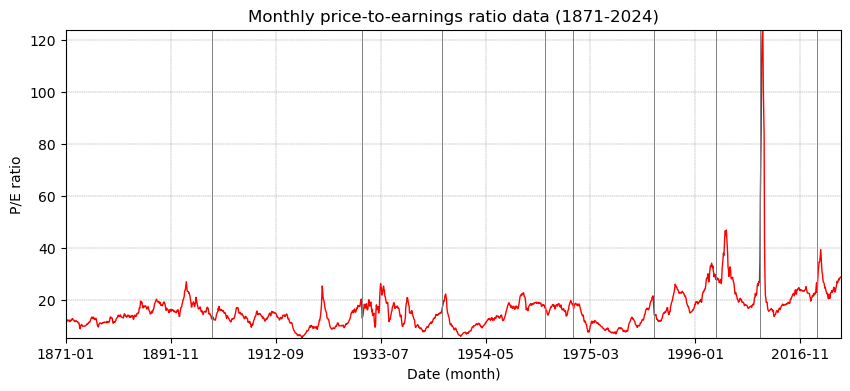

In [34]:
ratios_df.plot(x=DATE_COL, y=PE_COL, lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Monthly price-to-earnings ratio data (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("P/E ratio")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.1.2. Earnings yield

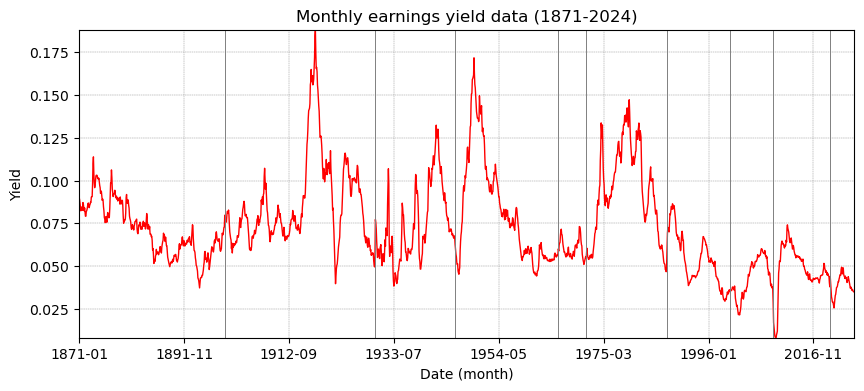

In [35]:
ratios_df.plot(x=DATE_COL, y=EY_COL, lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Monthly earnings yield data (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Yield")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.1.3. Price-to-dividends ratio

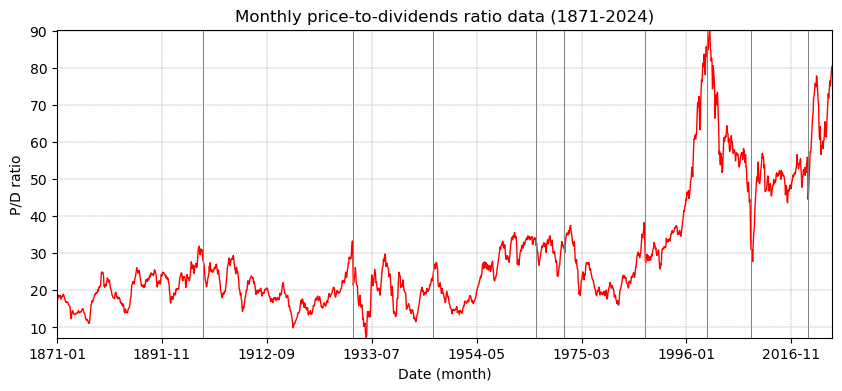

In [36]:
ratios_df.plot(x=DATE_COL, y=PD_COL, lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Monthly price-to-dividends ratio data (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("P/D ratio")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.1.4. Dividends yield

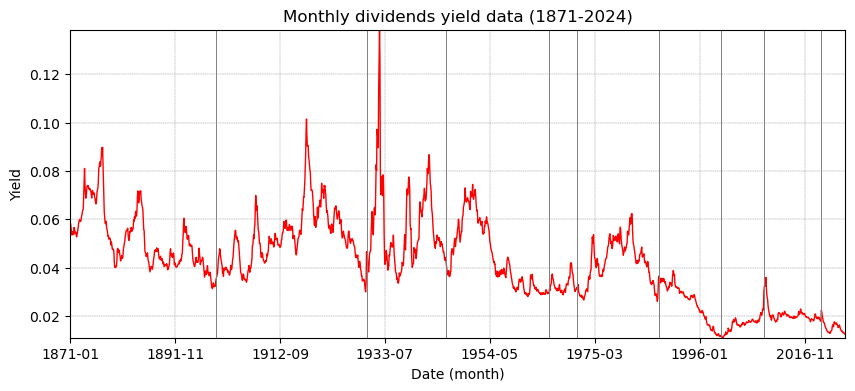

In [37]:
ratios_df.plot(x=DATE_COL, y=DY_COL, lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Monthly dividends yield data (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Yield")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.1.5. Dividend cover

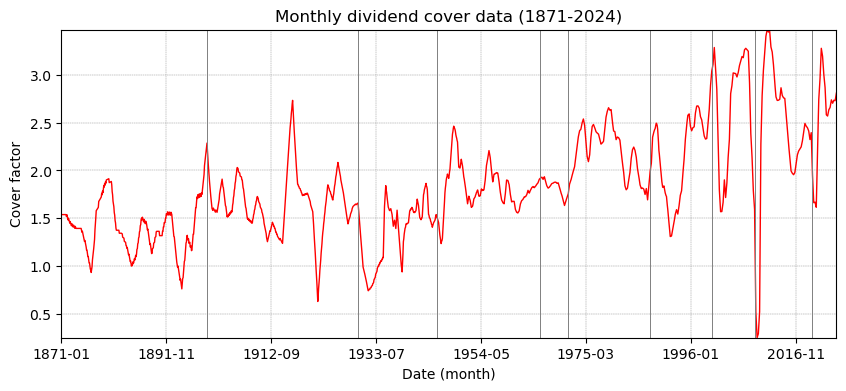

In [38]:
ratios_df.plot(x=DATE_COL, y=DC_COL, lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Monthly dividend cover data (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Cover factor")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.1.6. Dividend payout ratio

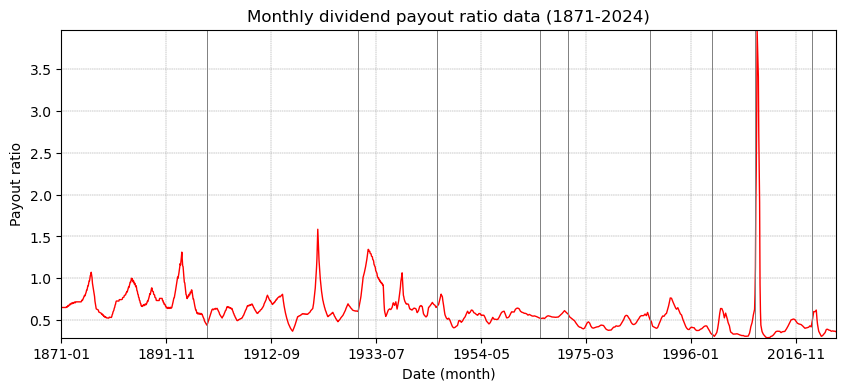

In [39]:
ratios_df.plot(x=DATE_COL, y=DP_COL, lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Monthly dividend payout ratio data (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Payout ratio")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

#### 7.2. Newer financial ratios analysis

##### 7.2.1. Half-cyclically-adjusted-price-to-earnings ratio

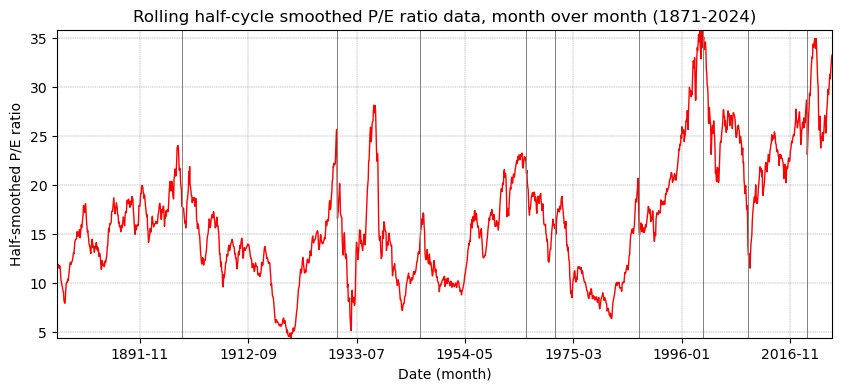

In [40]:
capes_df.plot(x="date", y="half_cape", lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling half-cycle smoothed P/E ratio data, month over month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Half-smoothed P/E ratio")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.2.2. Half-cyclically-adjusted-earnings-yield

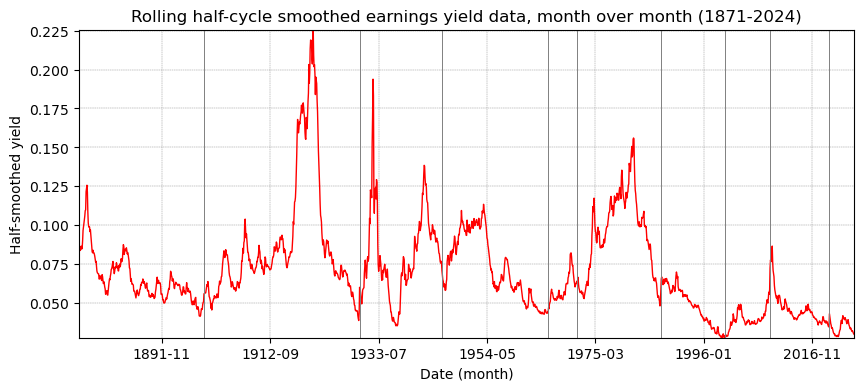

In [41]:
capes_df.plot(x="date", y="half_caey", lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling half-cycle smoothed earnings yield data, month over month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Half-smoothed yield")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.2.3. Cyclically-adjusted-price-to-earnings ratio (Shiller CAPE)

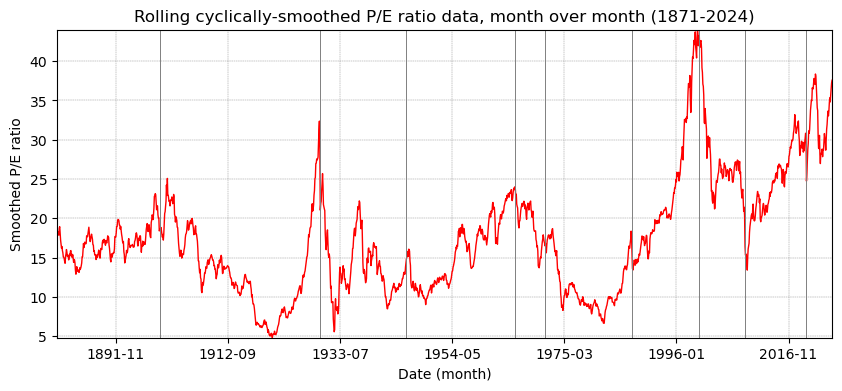

In [42]:
capes_df.plot(x="date", y="cape", lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling cyclically-smoothed P/E ratio data, month over month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Smoothed P/E ratio")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.2.4. Cyclically-adjusted-earnings-yield (Shiller CAEY)

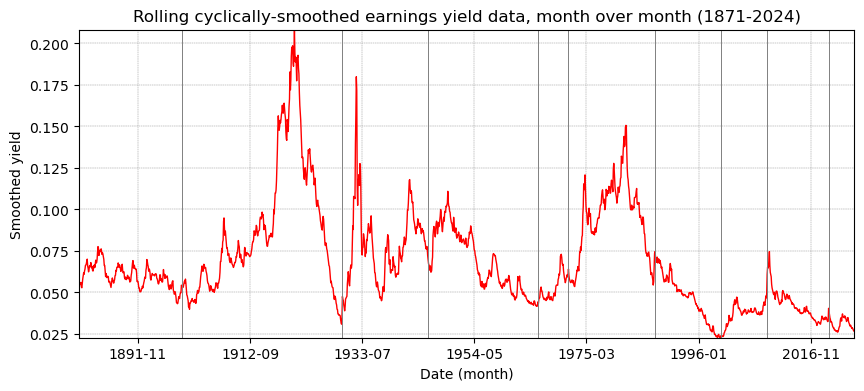

In [43]:
capes_df.plot(x="date", y="caey", lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling cyclically-smoothed earnings yield data, month over month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Smoothed yield")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.2.5. Payout-adjusted cyclically-adjusted-price-to-earnings ratio (Morningstar CAPE)

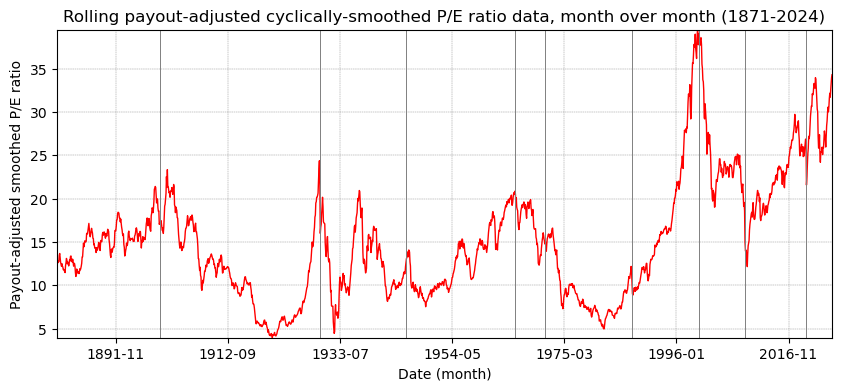

In [44]:
capes_df.plot(x="date", y="p-cape", lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling payout-adjusted cyclically-smoothed P/E ratio data, month over month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Payout-adjusted smoothed P/E ratio")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.2.6. Payout-adjusted cyclically-adjusted-earnings-yield (Morningstar CAEY)

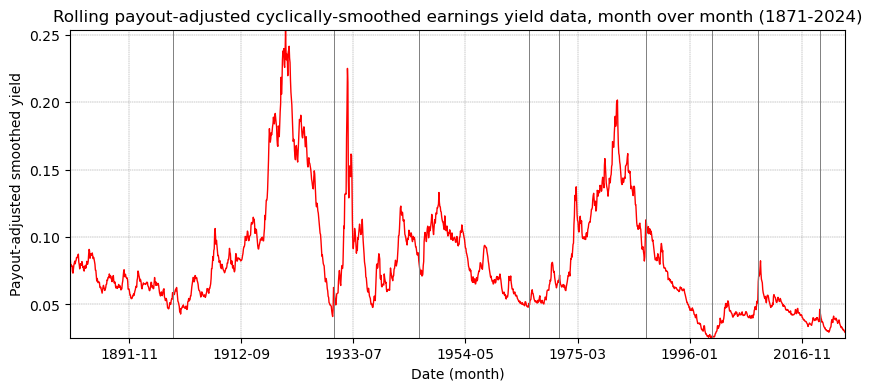

In [45]:
capes_df.plot(x="date", y="p-caey", lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling payout-adjusted cyclically-smoothed earnings yield data, month over month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Payout-adjusted smoothed yield")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.2.7. Tax-adjusted cyclically-adjusted-price-to-earnings ratio (ERN CAPE)

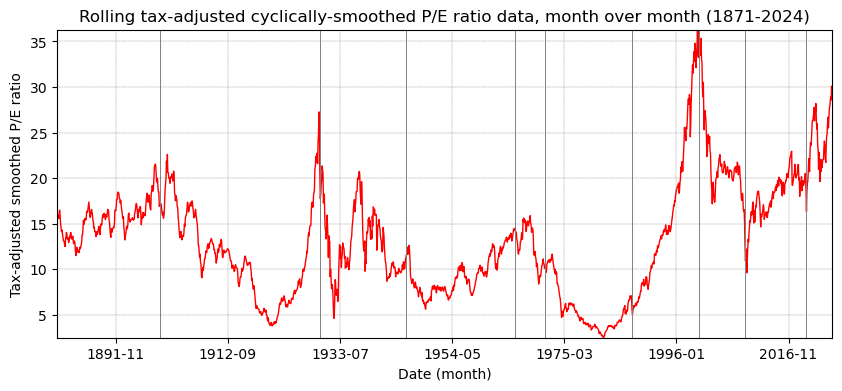

In [46]:
capes_df.plot(x="date", y="ern_cape", lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling tax-adjusted cyclically-smoothed P/E ratio data, month over month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Tax-adjusted smoothed P/E ratio")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.2.8. Tax-adjusted cyclically-adjusted-earnings-yield (ERN CAEY)

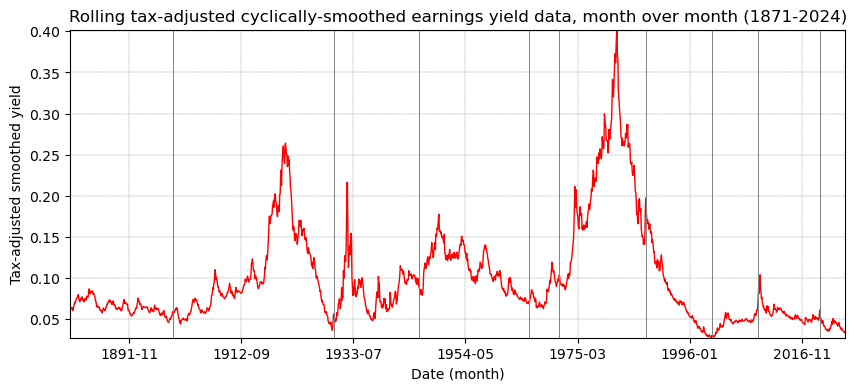

In [47]:
capes_df.plot(x="date", y="ern_caey", lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling tax-adjusted cyclically-smoothed earnings yield data, month over month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Tax-adjusted smoothed yield")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

#### 7.3. Various comparison charts

##### 7.3.1. Comparing P/E ratio to P/D ratio

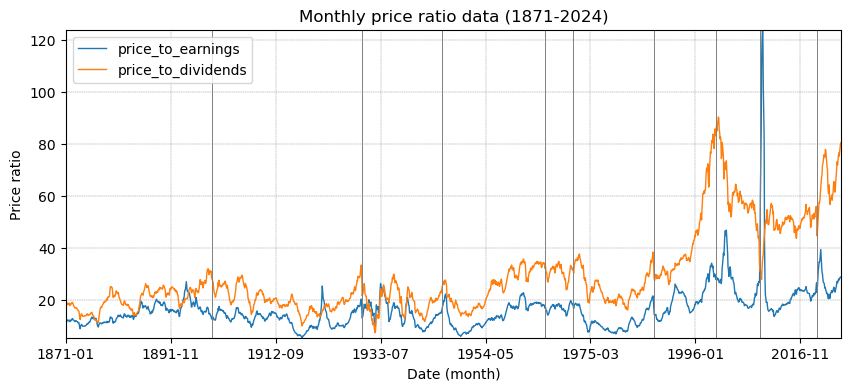

In [48]:
ratios_df.plot(x=DATE_COL, y=[PE_COL, PD_COL], lw=1.0, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Monthly price ratio data (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Price ratio")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.3.2. Comparing earnings yield to dividends yield

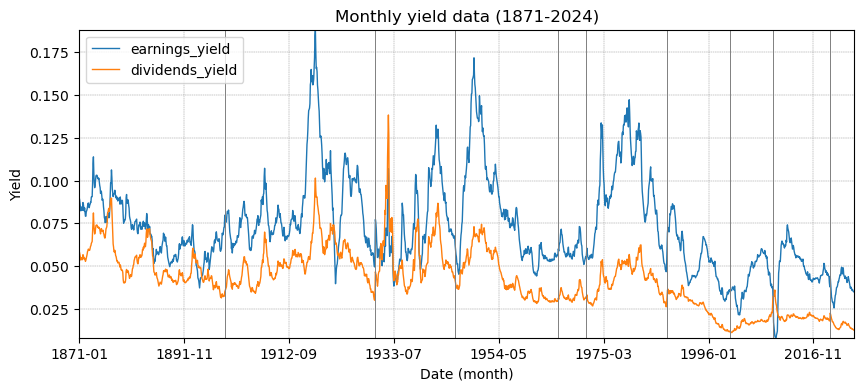

In [49]:
ratios_df.plot(x=DATE_COL, y=[EY_COL, DY_COL], lw=1.0, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Monthly yield data (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Yield")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.3.3. Comparing dividend cover to dividend payout ratio

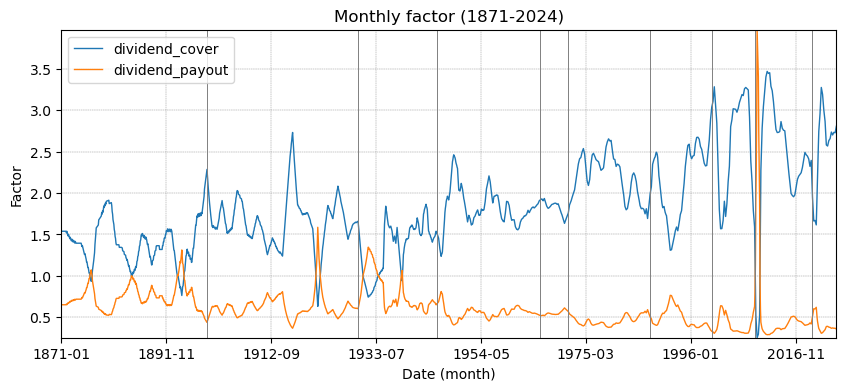

In [50]:
ratios_df.plot(x=DATE_COL, y=[DC_COL, DP_COL], lw=1.0, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Monthly factor (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Factor")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.3.4. Comparing P/E ratio to H-CAPE

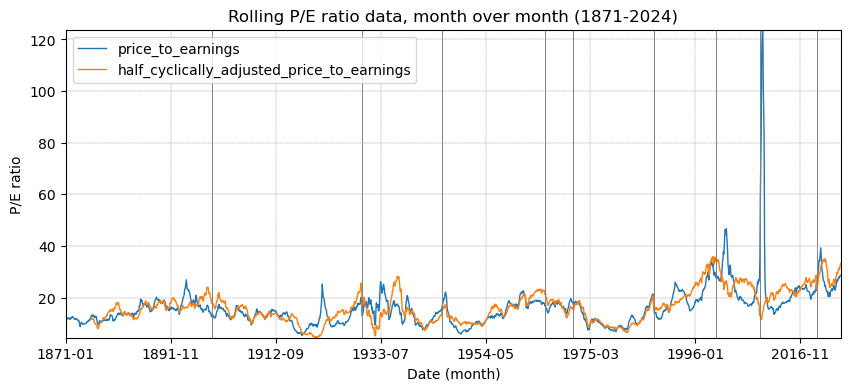

In [51]:
ratios_df.plot(x=DATE_COL, y=[PE_COL, H_CAPE_COL], lw=1.0, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling P/E ratio data, month over month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("P/E ratio")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.3.5. Comparing earnings yield to H-CAEY

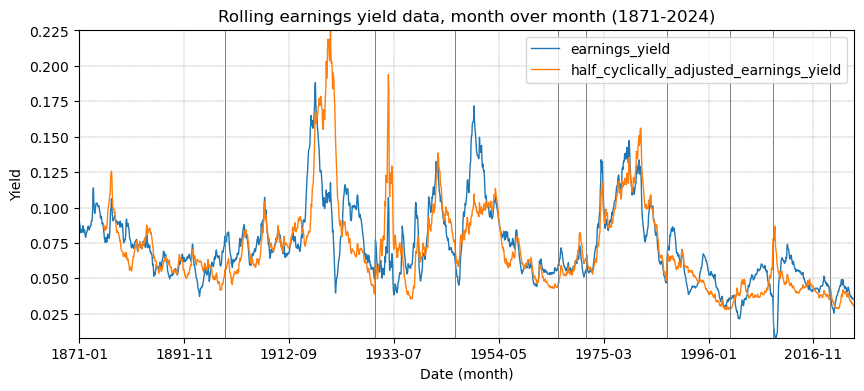

In [52]:
ratios_df.plot(x=DATE_COL, y=[EY_COL, H_CAEY_COL], lw=1.0, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling earnings yield data, month over month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Yield")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.3.6. Comparing P/E ratio to CAPE

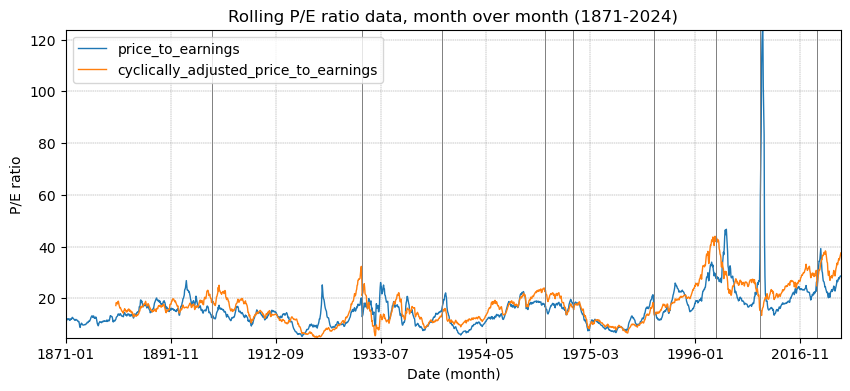

In [53]:
ratios_df.plot(x=DATE_COL, y=[PE_COL, CAPE_COL], lw=1.0, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling P/E ratio data, month over month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("P/E ratio")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.3.7. Comparing earnings yield to CAEY

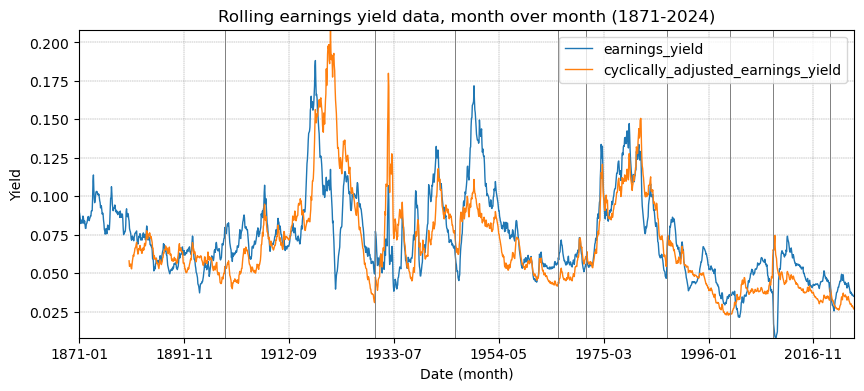

In [54]:
ratios_df.plot(x=DATE_COL, y=[EY_COL, CAEY_COL], lw=1.0, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling earnings yield data, month over month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Yield")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.3.8. Comparing H-CAPE to CAPE

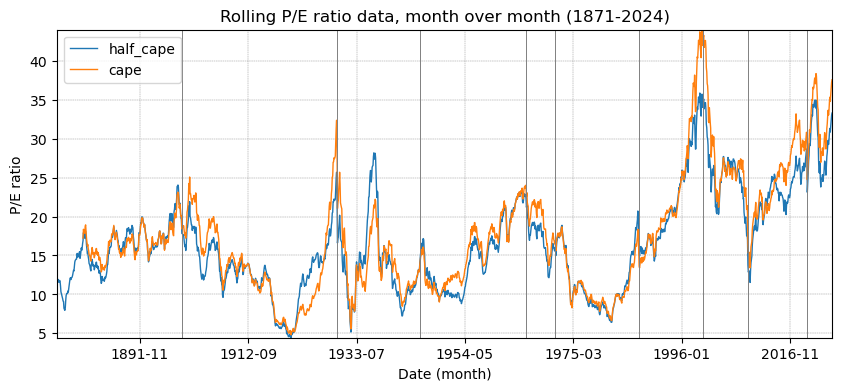

In [55]:
capes_df.plot(x=DATE_COL, y=["half_cape", "cape"], lw=1.0, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling P/E ratio data, month over month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("P/E ratio")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.3.9. Comparing H-CAEY to CAEY

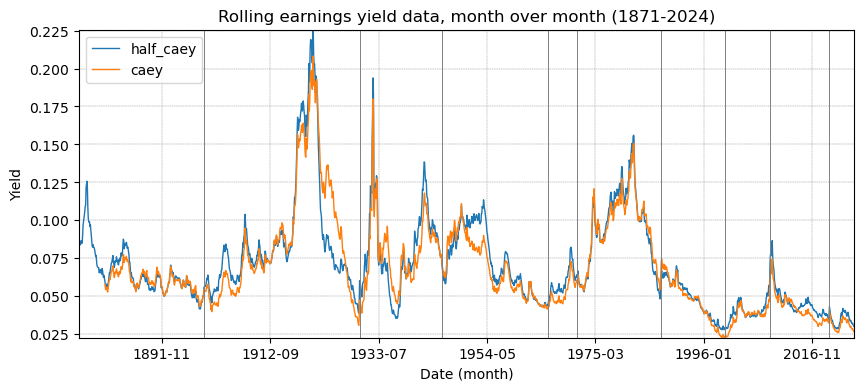

In [56]:
capes_df.plot(x=DATE_COL, y=["half_caey", "caey"], lw=1.0, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling earnings yield data, month over month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Yield")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.3.10. Comparing CAPE to P-CAPE

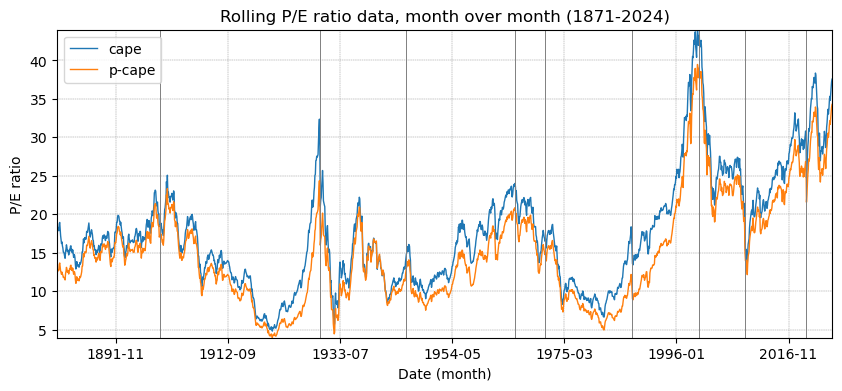

In [57]:
capes_df.plot(x=DATE_COL, y=["cape", "p-cape"], lw=1.0, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling P/E ratio data, month over month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("P/E ratio")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.3.11. Comparing CAEY to P-CAEY

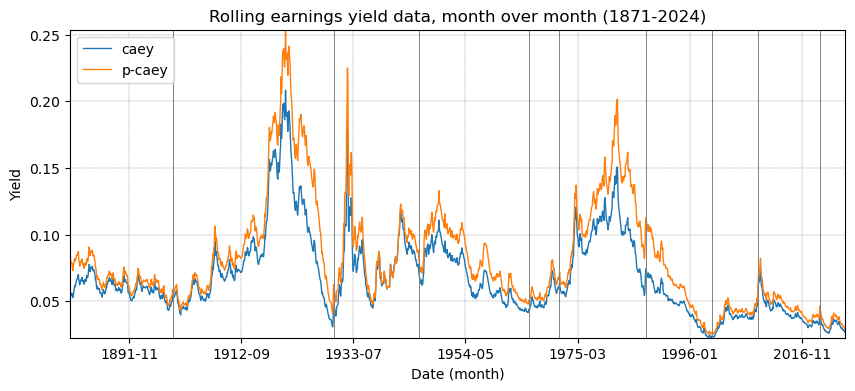

In [58]:
capes_df.plot(x=DATE_COL, y=["caey", "p-caey"], lw=1.0, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling earnings yield data, month over month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Yield")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.3.12. Comparing CAPE to ERN CAPE

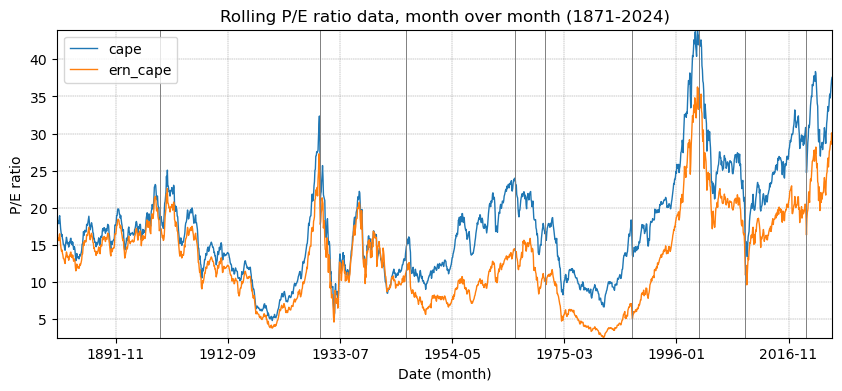

In [59]:
capes_df.plot(x=DATE_COL, y=["cape", "ern_cape"], lw=1.0, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling P/E ratio data, month over month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("P/E ratio")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.3.13. Comparing CAEY to ERN CAEY

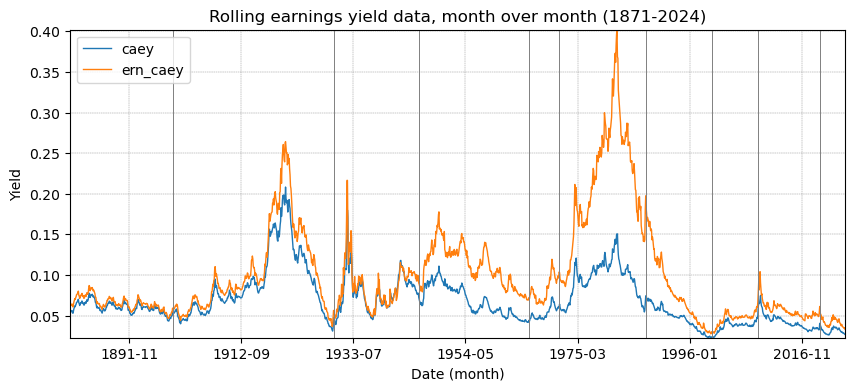

In [60]:
capes_df.plot(x=DATE_COL, y=["caey", "ern_caey"], lw=1.0, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling earnings yield data, month over month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Yield")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.3.14. Comparing P-CAPE to ERN CAPE

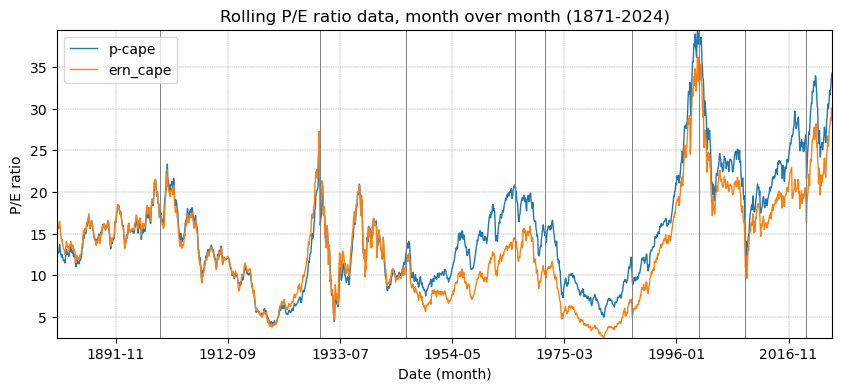

In [61]:
capes_df.plot(x=DATE_COL, y=["p-cape", "ern_cape"], lw=1.0, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling P/E ratio data, month over month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("P/E ratio")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.3.15. Comparing P-CAEY to ERN CAEY

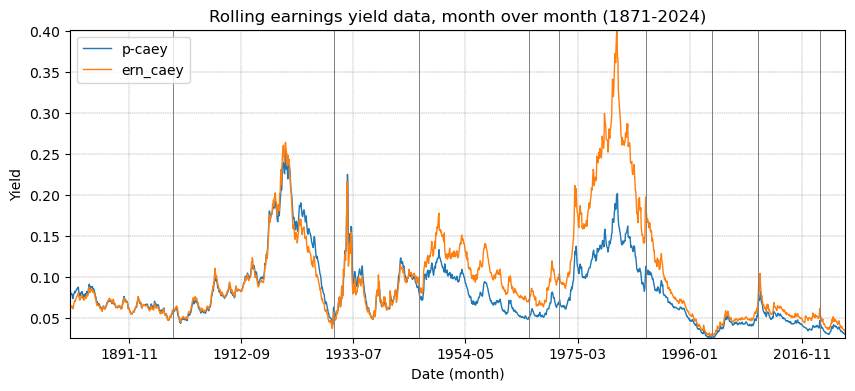

In [62]:
capes_df.plot(x=DATE_COL, y=["p-caey", "ern_caey"], lw=1.0, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling earnings yield data, month over month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Yield")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.3.16. Comparing all CAPEs except H-CAPE

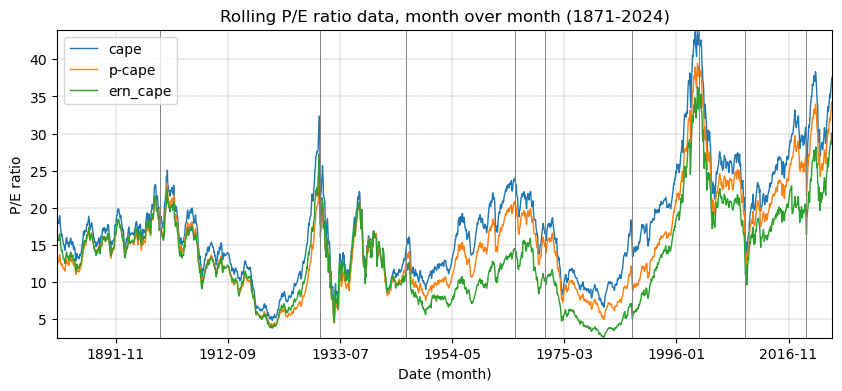

In [63]:
capes_df.plot(x=DATE_COL, y=["cape", "p-cape", "ern_cape"], lw=1.0, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling P/E ratio data, month over month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("P/E ratio")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.3.17. Comparing all CAEYs except H-CAEY

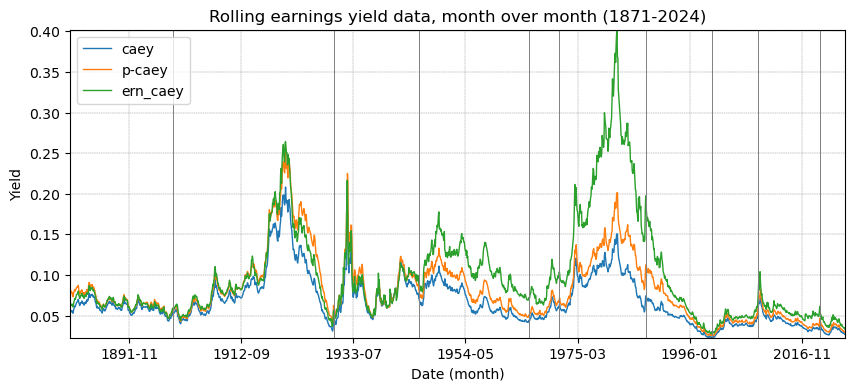

In [64]:
capes_df.plot(x=DATE_COL, y=["caey", "p-caey", "ern_caey"], lw=1.0, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling earnings yield data, month over month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Yield")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.3.18. Full comparison of all CAPEs

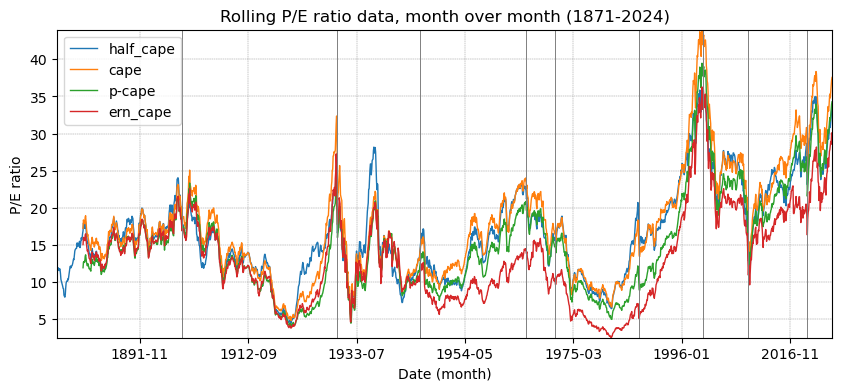

In [65]:
capes_df.plot(x=DATE_COL, y=["half_cape", "cape", "p-cape", "ern_cape"], lw=1.0, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling P/E ratio data, month over month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("P/E ratio")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 7.3.19. Full comparison of all CAEYs

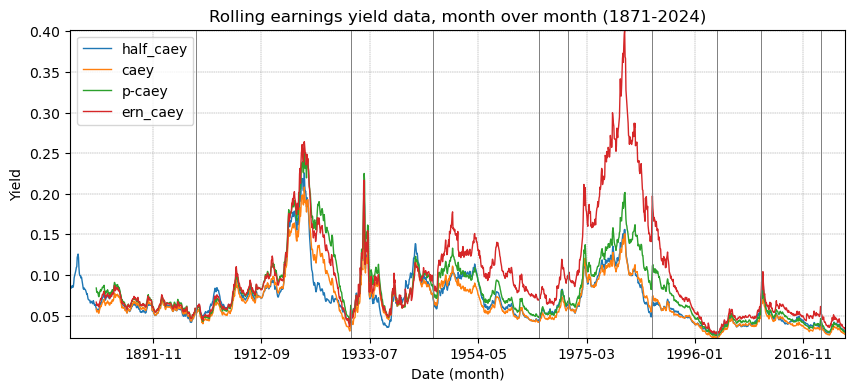

In [66]:
capes_df.plot(x=DATE_COL, y=["half_caey", "caey", "p-caey", "ern_caey"], lw=1.0, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling earnings yield data, month over month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Yield")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()